In [1]:
def read_text(fname):
    fo=open(fname,'r') #create file object
    #headstr=fo.readline()
    data=fo.readlines()
    #print (data)
    fo.close()  # close object
    return data


# main
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC
import h5py
import statsmodels.api as sm
from scipy import stats

fname='/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505.txt'

data=read_text(fname)
splitcol=data[0].split(' ')
Ncol=len(splitcol)-splitcol.count('')
Nrow=len(data)
#print(Ncol,Nrow)
# transfer data from string to float
dataT=np.zeros((Nrow,Ncol-1),'f')
lst=['']*93
colocated_fname = np.chararray(Nrow,itemsize=94)

for i in range(Nrow):
    splitcol=data[i].split(' ')
    k=0
    for j in range(len(splitcol)):
        if (j==len(splitcol)-1):
            colocated_fname[i]=splitcol[j]
          
        if splitcol[j] != '' and j < len(splitcol)-1 :
            dataT[i,k]=float(splitcol[j])
            k=k+1

OTlon=dataT[:,0]
OTlat=dataT[:,1]
OTprob=dataT[:,2]
OTflag=dataT[:,3]
strflag=dataT[:,4]

# obtain high confidence OT
index=np.where((OTflag ==1) & (OTprob > 0.8))
index=index[0]
GOTlon=OTlon[index]
GOTlat=OTlat[index]
GOTprob=OTprob[index]
GOTfname=colocated_fname[index]
OT_num=index.shape
OT_num=OT_num[0]
print('num of high confident OT',OT_num)
GOTBT11=np.zeros(OT_num,'f')
GOTBT67=np.zeros(OT_num,'f')
GOTTrop=np.zeros(OT_num,'f')
GOTaveci=np.zeros(OT_num,'f')
GOTcistd=np.zeros(OT_num,'f')
GOTedstd=np.zeros(OT_num,'f')
#GOTcorr =np.zeros(OT_num,'f')

#set_circle=np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],dtype=float)
#set_circle1=np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])
#print(stats.spearmanr(set_circle,set_circle1))
#print(set_circle)
#print(GOTlon[0],GOTlat[0],GOTfname[0])
#print(index)
#=== read OT information

for fi in range(OT_num):
    tp_GOTfname=GOTfname[fi]
    
    data=read_text(tp_GOTfname)
    splitcol=data[0].split(' ')
    MODNcol=len(splitcol)-splitcol.count('')
    MODNrow=len(data)
    #print(Ncol,Nrow)
    # transfer data from string to float
    dataT=np.zeros((MODNrow,MODNcol),'f')
    
    for i in range(MODNrow):
        splitcol=data[i].split(' ')
            #print(splitcol)
           
        k=0
        for j in range(len(splitcol)):
            if splitcol[j] != '' and splitcol[j] != '\n' :
                dataT[i,k]=float(splitcol[j])
                k=k+1
    MODlon=dataT[:,2]
    MODlat=dataT[:,3]
    MODprob=dataT[:,14]
    MODCBT11=dataT[:,16]
    MODCBT67=dataT[:,18]
    tropopause_T=dataT[:,20]
    MODciaBT=dataT[:,21]
    MODciBT=dataT[:,22:30]
    OTedge = dataT[:,30:38]
    #print(MODCBT11,MODCBT67,tropopause_T,MODciaBT)
    #print(MODciBT)
    #print(OTedge)
    ind=np.where((GOTlon[fi] == MODlon) & (GOTlat[fi] == MODlat) & (GOTprob[fi] == MODprob))
    ind=ind[0]
  
    GOTBT11[fi]=MODCBT11[ind]
    GOTBT67[fi]=MODCBT67[ind]
    GOTTrop[fi]=tropopause_T[ind]
    GOTaveci[fi]=MODciaBT[ind]
    GOTcistd[fi]=np.std(MODciBT[ind,:])/np.mean(MODciBT[ind,:])
    GOTedstd[fi]=np.std(OTedge[ind,:])/np.mean(OTedge[ind,:])
    #OTedge1=np.zeros(8,'f')
    #for ri in range(8):
    #    OTedge1[ri]=OTedge[ind,ri]
        
    #print(np.corrcoef(set_circle,OTedge1))
    #GOTcorr[fi]=np.corrcoef(set_circle,OTedge1)
    
    #GOTcorr[fi]=stats.spearmanr(set_circle,OTedge1)
    #print(ind,GOTlon[fi],GOTlat[fi],GOTprob[fi])
    #print(MODciBT[ind,:],np.std(MODciBT[ind,:]))
    #print(OTedge[ind,:],np.std(OTedge[ind,:]))#,GOTedstd[fi])                

# get low confidence OT
index=np.where((OTflag ==0) & (OTprob > 0.8))
index=index[0]
GNOTlon=OTlon[index]
GNOTlat=OTlat[index]
GNOTprob=OTprob[index]
GNOTfname=colocated_fname[index]
NOT_num=index.shape
NOT_num=NOT_num[0]
print('num of low confident OT',NOT_num)
GNOTBT11=np.zeros(NOT_num,'f')
GNOTBT67=np.zeros(NOT_num,'f')
GNOTTrop=np.zeros(NOT_num,'f')
GNOTaveci=np.zeros(NOT_num,'f')
GNOTcistd=np.zeros(NOT_num,'f')
GNOTedstd=np.zeros(NOT_num,'f')
GNOTcorr =np.zeros(NOT_num,'f')

for fi in range(NOT_num):
    tp_GNOTfname=GNOTfname[fi]
    
    data=read_text(tp_GNOTfname)
    splitcol=data[0].split(' ')
    MODNcol=len(splitcol)-splitcol.count('')
    MODNrow=len(data)
    #print(Ncol,Nrow)
    # transfer data from string to float
    dataT=np.zeros((MODNrow,MODNcol),'f')
    
    for i in range(MODNrow):
        splitcol=data[i].split(' ')
            #print(splitcol)
           
        k=0
        for j in range(len(splitcol)):
            if splitcol[j] != '' and splitcol[j] != '\n' :
                dataT[i,k]=float(splitcol[j])
                k=k+1
    MODlon=dataT[:,2]
    MODlat=dataT[:,3]
    MODprob=dataT[:,14]
    MODCBT11=dataT[:,16]
    MODCBT67=dataT[:,18]
    tropopause_T=dataT[:,20]
    MODciaBT=dataT[:,21]
    MODciBT=dataT[:,22:30]
    OTedge = dataT[:,30:38]
    #print(MODCBT11,MODCBT67,tropopause_T,MODciaBT)
    #print(MODciBT)
    #print(OTedge)
    ind=np.where((GNOTlon[fi] == MODlon) & (GNOTlat[fi] == MODlat) & (GNOTprob[fi] == MODprob))
    ind=ind[0]
    GNOTBT11[fi]=MODCBT11[ind]
    GNOTBT67[fi]=MODCBT67[ind]
    GNOTTrop[fi]=tropopause_T[ind]
    GNOTaveci[fi]=MODciaBT[ind]
    GNOTcistd[fi]=np.std(MODciBT[ind,:])/np.mean(MODciBT[ind,:])
    GNOTedstd[fi]=np.std(OTedge[ind,:])/np.mean(OTedge[ind,:])
    #GNOTcorr[fi]=spearmanr(OTedge[ind,:],circle)
print('finish')

num of high confident OT 385


ValueError: setting an array element with a sequence.

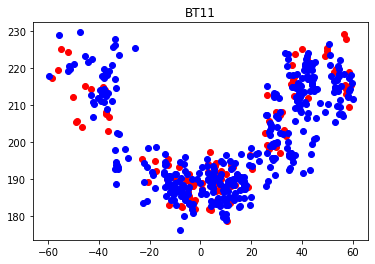

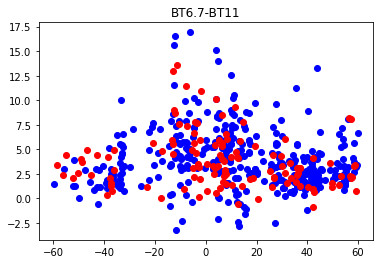

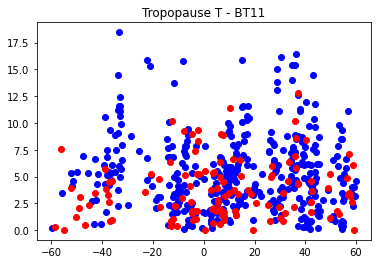

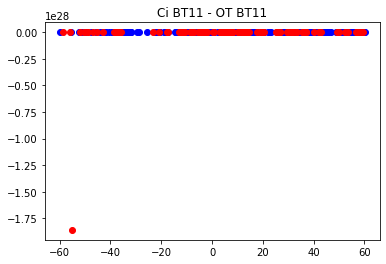

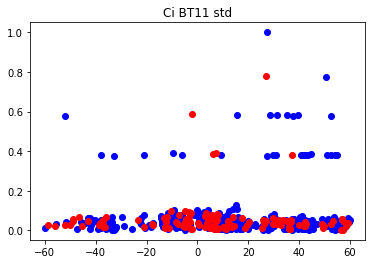

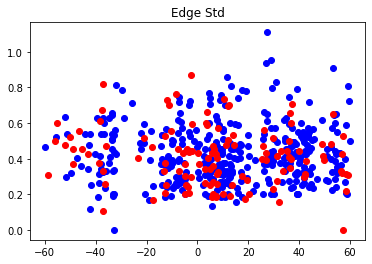

In [8]:
plt.plot(GNOTlat,GNOTBT11,'ro')
plt.plot(GOTlat,GOTBT11,'bo')
plt.title('BT11')
plt.show()
plt.plot(GOTlat,GOTBT67-GOTBT11,'bo')
plt.plot(GNOTlat,GNOTBT67-GNOTBT11,'ro')
plt.title('BT6.7-BT11')
plt.show()

plt.plot(GOTlat,GOTTrop-GOTBT11,'bo')
plt.plot(GNOTlat,GNOTTrop-GNOTBT11,'ro')
plt.title('Tropopause T - BT11')
plt.show()

plt.plot(GOTlat,GOTaveci-GOTBT11,'bo')
plt.plot(GNOTlat,GNOTaveci-GNOTBT11,'ro')
plt.title('Ci BT11 - OT BT11')
plt.show()

plt.plot(GOTlat,GOTcistd,'bo')
plt.plot(GNOTlat,GNOTcistd,'ro')
plt.title('Ci BT11 std')
plt.show()

plt.plot(GOTlat,GOTedstd,'bo')
plt.plot(GNOTlat,GNOTedstd,'ro')
plt.title('Edge Std')
plt.show()

#plt.plot(GOTlat,GOTcorr,'bo')
#plt.plot(GNOTlat,GNOTcorr,'ro')
#plt.show()